In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [11]:
df_cell = pd.read_csv('cell_samples.csv')

In [12]:
df_cell.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

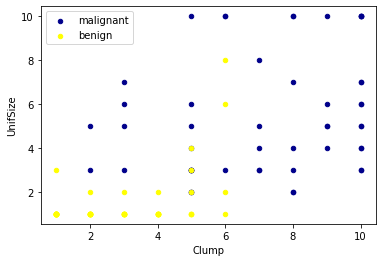

In [15]:
ax = df_cell[df_cell['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df_cell[df_cell['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

# Data pre-processing and selection

In [17]:
df_cell.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df_cell = df_cell[pd.to_numeric(df_cell['BareNuc'], errors = 'coerce').notnull()]
df_cell['BareNuc'] = df_cell['BareNuc'].astype('int')
df_cell.dtypes

<ipython-input-19-babfb13f7a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cell['BareNuc'] = df_cell['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [20]:
feature_df = df_cell[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [21]:
df_cell['Class'] = df_cell['Class'].astype('int')
y = np.asarray(df_cell['Class'])
y[0:5]

<ipython-input-21-f3c4e236e85a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cell['Class'] = df_cell['Class'].astype('int')


array([2, 2, 2, 2, 2])

# Train/Test dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (681, 9) (681,)
Test set:  (2, 9) (2,)


# Modeling (SVM with Scikit-learn)

The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
<br>
1.Linear<br>
2.Polynomial<br>
3.Radial basis function (RBF)<br>
4.Sigmoid<br>

Let's just use the default, RBF (Radial Basis Function) for this lab.

In [23]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

After being fitted, the model can then be used to predict new values:

In [26]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 4])

# Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [30]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '%.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion matrix without normalization
[[1 0]
 [0 1]]


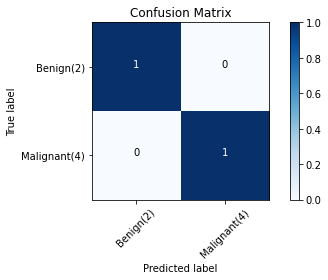

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title='Confusion Matrix')

# We can also easily use the f1_score fron sklearn library:

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

1.0

# Lets try jaccard index for accuracy:

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

ValueError: pos_label=1 is not a valid label: array([2, 4])

In [38]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)

yhat2 = clf2.predict(X_test)
print('Avg F1-score: %.4f' % f1_score(y_test, yhat2, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat2))

Avg F1-score: 1.0000


ValueError: pos_label=1 is not a valid label: array([2, 4])